In [110]:
from heapq import merge
from itertools import groupby

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastf1
from fontTools.subset import subset
import seaborn as sns
import fastf1.plotting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [111]:
quali_data = fastf1.get_session(2025, 'Qatar', 'SQ')
quali_data.load(laps=True)

quali2_data = fastf1.get_session(2025, 'Qatar', 'Q')
quali2_data.load(laps=True)

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Sprint Qualifying [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cach

In [112]:
empty = quali_data.laps["LapTime"].isna().sum()
print(empty)
empty2 = quali2_data.laps["LapTime"].isna().sum()
print(empty2)


58
99


In [113]:
quali_data_wanted = quali_data.laps[["LapTime", "Driver"]]
quali_data2_wanted = quali2_data.laps[["LapTime", "Driver"]]


quali_data_wanted.dropna(subset="LapTime", inplace=True)
quali_data2_wanted.dropna(subset="LapTime", inplace=True)


C:\Users\pioot\AppData\Local\Temp\ipykernel_21400\1800363600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quali_data_wanted.dropna(subset="LapTime", inplace=True)
C:\Users\pioot\AppData\Local\Temp\ipykernel_21400\1800363600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quali_data2_wanted.dropna(subset="LapTime", inplace=True)


In [114]:
fastest_sq = quali_data_wanted.sort_values("LapTime", ascending=True).drop_duplicates(subset=['Driver'])

fastest_sq["LapTime"] = fastest_sq["LapTime"].dt.total_seconds()

print(fastest_sq.head())

     LapTime Driver
281   80.055    PIA
263   80.087    RUS
33    80.285    NOR
107   80.450    ALO
154   80.519    TSU


C:\Users\pioot\AppData\Local\Temp\ipykernel_21400\4180925147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastest_sq["LapTime"] = fastest_sq["LapTime"].dt.total_seconds()


In [115]:
fastest_q = quali_data2_wanted.sort_values("LapTime", ascending=True).drop_duplicates(subset=['Driver'])
fastest_q["LapTime"] = fastest_q["LapTime"].dt.total_seconds()

print(fastest_q.head())

     LapTime Driver
16    79.387    PIA
31    79.495    NOR
56    79.651    VER
82    79.662    RUS
104   79.846    ANT


C:\Users\pioot\AppData\Local\Temp\ipykernel_21400\2786107014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastest_q["LapTime"] = fastest_q["LapTime"].dt.total_seconds()


In [116]:
fp1 = fastf1.get_session(2025, 'Qatar', 'FP1')
fp1.load(laps=True)

events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Practice 1 [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '10', '12', '14', '16

In [117]:
quick_laps = fp1.laps
quick_laps = quick_laps.pick_quicklaps()

wanted = quick_laps[["LapTime", "Driver", "Compound", "Team"]]

wanted_clean = wanted.dropna(subset=["LapTime"]).copy()

wanted_clean["LapTime"] = wanted_clean["LapTime"].dt.total_seconds()

avg_pace_per_compound = wanted_clean.groupby(["Driver", "Compound"])["LapTime"].mean()

print(avg_pace_per_compound.sort_values())

Driver  Compound
PIA     SOFT        81.068000
ALO     SOFT        81.436000
VER     SOFT        81.504000
SAI     SOFT        81.540500
ALB     SOFT        81.609000
HAD     SOFT        81.661000
HAM     SOFT        81.794000
STR     SOFT        81.796667
ANT     SOFT        81.817500
RUS     SOFT        81.824000
LEC     SOFT        81.874500
TSU     SOFT        81.951000
BEA     SOFT        82.160000
BOR     SOFT        82.242000
OCO     SOFT        82.403667
GAS     SOFT        82.424000
NOR     SOFT        82.525667
LAW     SOFT        82.562000
SAI     HARD        83.362250
HUL     SOFT        83.795000
PIA     HARD        84.111000
HUL     HARD        84.304857
STR     HARD        84.309750
ALB     HARD        84.312000
NOR     HARD        84.318556
ALO     HARD        84.345375
LEC     HARD        84.433444
HAM     HARD        84.463250
GAS     HARD        84.572333
RUS     HARD        84.864333
HAD     HARD        84.873333
LAW     HARD        85.027364
BOR     HARD        85.

In [118]:
driver_colors = {}

for driver in wanted_clean["Driver"].unique():
    # Get the team name for this specific driver
    team_name = wanted_clean.loc[wanted_clean["Driver"] == driver, "Team"].iloc[0]

    # Get the color for that team from FastF1
    color = fastf1.plotting.get_team_color(team_name, session=fp1)

    # Add to dictionary
    driver_colors[driver] = color

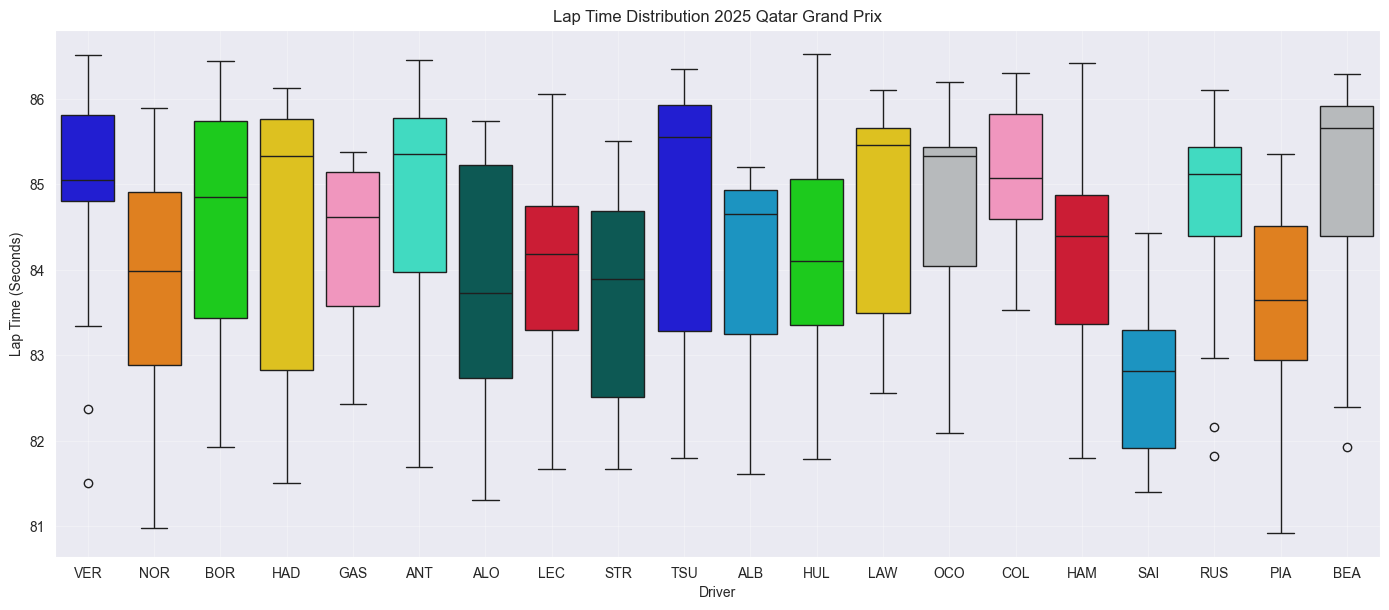

In [119]:
plt.figure(figsize=(14, 6))

sns.boxplot(
    x="Driver",
    y="LapTime",
    data=wanted_clean,
    hue="Driver",         # We color by Driver now
    palette=driver_colors, # Using our new Driver->Color map
    dodge=False,
    legend=False           # Hide legend since names are on X-axis
)
plt.tight_layout()
plt.title(f"Lap Time Distribution 2025 Qatar Grand Prix")
plt.ylabel("Lap Time (Seconds)")
plt.grid(True, alpha=0.3)

In [120]:
#merging data
merged_quali = fastest_sq.merge(fastest_q, right_on='Driver', left_on='Driver', how='inner')

print(merged_quali.head())

   LapTime_x Driver  LapTime_y
0     80.055    PIA     79.387
1     80.087    RUS     79.662
2     80.285    NOR     79.495
3     80.450    ALO     80.219
4     80.519    TSU     80.761


In [121]:
pace_features = avg_pace_per_compound.unstack(level="Compound")
pace_features = pace_features.add_prefix("Pace_")
pace_features = pace_features.reset_index()
print(pace_features.head())

Compound Driver  Pace_HARD  Pace_SOFT
0           ALB  84.312000    81.6090
1           ALO  84.345375    81.4360
2           ANT  85.157600    81.8175
3           BEA  85.554444    82.1600
4           BOR  85.041100    82.2420


In [122]:
final_data = pace_features.merge(merged_quali, left_on='Driver', right_on='Driver', how='left')
print(final_data.head())

  Driver  Pace_HARD  Pace_SOFT  LapTime_x  LapTime_y
0    ALB  84.312000    81.6090     80.788     80.629
1    ALO  84.345375    81.4360     80.450     80.219
2    ANT  85.157600    81.8175     80.532     79.846
3    BEA  85.554444    82.1600     81.494     80.438
4    BOR  85.041100    82.2420     81.567     80.534


In [123]:
race = fastf1.get_session(2024,'Qatar' ,'Race')
race.load(laps=True)

events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '43'
core        WARNING 	Fixed incorrect tyre stint information for driver '31'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           

In [124]:
race_laps = race.laps.pick_accurate()
race_laps["LapTime"] = race_laps["LapTime"].dt.total_seconds()
target_data = race_laps.groupby("Driver")["LapTime"].mean().reset_index()

C:\Users\pioot\AppData\Local\Temp\ipykernel_21400\1368896202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_laps["LapTime"] = race_laps["LapTime"].dt.total_seconds()


In [125]:
dataset_2025 = wanted_clean.copy()
merged_df = pd.merge(dataset_2025, target_data, on="Driver", how="left")

print(merged_df)

     LapTime_x Driver Compound             Team  LapTime_y
0       85.047    VER     HARD  Red Bull Racing  84.673378
1       83.343    VER     HARD  Red Bull Racing  84.673378
2       82.372    VER     HARD  Red Bull Racing  84.673378
3       86.510    VER     HARD  Red Bull Racing  84.673378
4       86.296    VER     HARD  Red Bull Racing  84.673378
..         ...    ...      ...              ...        ...
221     86.006    BEA     HARD     Haas F1 Team        NaN
222     85.535    BEA     HARD     Haas F1 Team        NaN
223     86.289    BEA     HARD     Haas F1 Team        NaN
224     82.394    BEA     SOFT     Haas F1 Team        NaN
225     81.926    BEA     SOFT     Haas F1 Team        NaN

[226 rows x 5 columns]


In [126]:
avg_history = merged_df["LapTime_y"].mean()
merged_df = merged_df.fillna(avg_history)

In [127]:
data_grouped = merged_df.groupby(["Driver", "Team"]).agg({
    "LapTime_x": "mean",
    "LapTime_y": "first"
}).reset_index()

data_grouped = data_grouped.rename(columns={
    "LapTime_x": "Actual_Race_Pace",
    "LapTime_y": "Historical_Pace"
})

In [128]:
print(data_grouped)

   Driver             Team  Actual_Race_Pace  Historical_Pace
0     ALB         Williams         84.041700        87.389262
1     ALO     Aston Martin         83.763500        86.196067
2     ANT         Mercedes         84.764647        86.399812
3     BEA     Haas F1 Team         84.937273        86.399812
4     BOR      Kick Sauber         84.574583        86.399812
5     COL           Alpine         85.100500        86.399812
6     GAS           Alpine         84.265429        85.965311
7     HAD     Racing Bulls         84.289273        86.399812
8     HAM          Ferrari         84.166667        86.064262
9     HUL      Kick Sauber         84.191556        87.579407
10    LAW     Racing Bulls         84.821917        87.475600
11    LEC          Ferrari         83.968182        85.060289
12    NOR          McLaren         83.870333        84.818070
13    OCO     Haas F1 Team         84.658800        86.399812
14    PIA          McLaren         83.502400        85.034568
15    RU

In [129]:
print(final_data)

   Driver  Pace_HARD  Pace_SOFT  LapTime_x  LapTime_y
0     ALB  84.312000  81.609000     80.788     80.629
1     ALO  84.345375  81.436000     80.450     80.219
2     ANT  85.157600  81.817500     80.532     79.846
3     BEA  85.554444  82.160000     81.494     80.438
4     BOR  85.041100  82.242000     81.567     80.534
5     COL  85.100500        NaN     82.364     81.137
6     GAS  84.572333  82.424000     82.112     80.324
7     HAD  84.873333  81.661000     81.277     80.114
8     HAM  84.463250  81.794000     82.043     80.907
9     HUL  84.304857  83.795000     81.327     80.353
10    LAW  85.027364  82.562000     81.851     80.433
11    LEC  84.433444  81.874500     80.622     80.343
12    NOR  84.318556  82.525667     80.285     79.495
13    OCO  85.222583  82.403667     81.666     80.864
14    PIA  84.111000  81.068000     80.055     79.387
15    RUS  84.864333  81.824000     80.087     79.662
16    SAI  83.362250  81.540500     80.542     80.251
17    STR  84.309750  81.796

In [130]:
full_df = pd.merge(final_data, data_grouped, on="Driver")
full_df = full_df.rename(columns={
    "LapTime_x": "Quali_Time",
    "LapTime_y": "FP1_Time"
})



In [131]:
features = full_df[['Pace_HARD', 'Pace_SOFT','Quali_Time', 'FP1_Time', 'Actual_Race_Pace']]
X = features
X = X.fillna(82.424000)
y = full_df['Historical_Pace']
print(X)

    Pace_HARD  Pace_SOFT  Quali_Time  FP1_Time  Actual_Race_Pace
0   84.312000  81.609000      80.788    80.629         84.041700
1   84.345375  81.436000      80.450    80.219         83.763500
2   85.157600  81.817500      80.532    79.846         84.764647
3   85.554444  82.160000      81.494    80.438         84.937273
4   85.041100  82.242000      81.567    80.534         84.574583
5   85.100500  82.424000      82.364    81.137         85.100500
6   84.572333  82.424000      82.112    80.324         84.265429
7   84.873333  81.661000      81.277    80.114         84.289273
8   84.463250  81.794000      82.043    80.907         84.166667
9   84.304857  83.795000      81.327    80.353         84.191556
10  85.027364  82.562000      81.851    80.433         84.821917
11  84.433444  81.874500      80.622    80.343         83.968182
12  84.318556  82.525667      80.285    79.495         83.870333
13  85.222583  82.403667      81.666    80.864         84.658800
14  84.111000  81.068000 

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X)
rmse = mean_squared_error(y, predictions)

print(f"Błąd modelu (RMSE): {rmse:.3f} sekundy")



Błąd modelu (RMSE): 2.355 sekundy


C:\Users\pioot\AppData\Local\Temp\ipykernel_21400\3749495984.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Waznosc', y='Cecha', data=importances, palette='viridis')


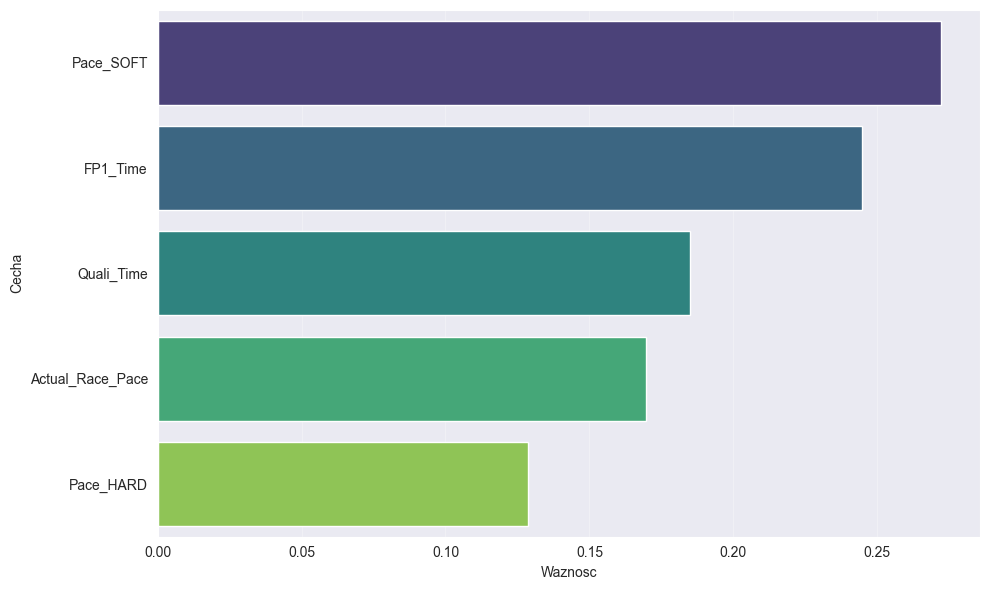

In [133]:
importances = pd.DataFrame({
    'Cecha': X.columns,
    'Waznosc': model.feature_importances_
})

importances = importances.sort_values(by='Waznosc', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Waznosc', y='Cecha', data=importances, palette='viridis')

plt.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [134]:
merged = full_df.copy()
merged["PredictedRaceTime"] = predictions

best_laps = merged.sort_values(by="PredictedRaceTime").groupby("Driver", as_index=False).first()
best_laps = best_laps.sort_values(by="PredictedRaceTime")

print(best_laps[["Driver", "PredictedRaceTime", "Actual_Race_Pace"]].round(3))

   Driver  PredictedRaceTime  Actual_Race_Pace
14    PIA             85.026            83.502
12    NOR             85.186            83.870
1     ALO             85.190            83.764
19    VER             85.328            84.815
16    SAI             85.343            82.755
11    LEC             85.424            83.968
17    STR             85.753            83.624
15    RUS             85.810            84.674
0     ALB             85.811            84.042
6     GAS             86.093            84.265
2     ANT             86.147            84.765
8     HAM             86.150            84.167
7     HAD             86.187            84.289
5     COL             86.416            85.100
13    OCO             86.473            84.659
4     BOR             86.483            84.575
3     BEA             86.587            84.937
18    TSU             86.955            84.645
10    LAW             87.137            84.822
9     HUL             87.152            84.192
